## Tools

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import OneHotEncoder

## Data set

In [13]:
tumor = pd.read_csv("primary_tumor.csv", sep=",")
tumor = tumor.sample(frac=1, random_state=41)
tumor = tumor.drop('degree_of_diffe', axis=1)
tumor

,age,sex,histologic_type,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,binaryClass
299,30-59,female,adeno,no,no,no,no,no,no,no,no,no,no,yes,no,no,N
14,30-59,male,epidermoid,yes,no,no,no,no,no,no,yes,yes,yes,no,no,no,P
63,30-59,female,adeno,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,N
196,30-59,male,?,yes,no,no,no,no,no,no,yes,no,no,no,no,no,P
257,>=60,male,adeno,no,no,yes,no,no,no,no,no,no,yes,no,no,no,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,30-59,female,adeno,no,no,no,no,no,no,no,no,no,no,yes,no,no,N
89,30-59,female,epidermoid,no,no,no,no,no,yes,yes,no,no,no,no,yes,no,P
243,>=60,female,?,no,no,no,no,no,no,no,no,no,no,no,no,yes,N
321,>=60,female,adeno,no,no,no,no,yes,no,no,no,no,no,no,no,no,N


## Preprocessing (Encoding)

In [14]:
def ohe (dataset, col, target_col): # "dataset" must be a pd.DataFrame, "col" must be an array of strings, #"target_col" is self explicatory
    enc = OneHotEncoder()
    t = enc.fit_transform(X=dataset[col], y=None).toarray()
    con = np.concatenate(enc.categories_)
    print('***** Performing One Hot Encoding ***** \n All attributes encoded: ', con, " \n Shape of the new layout: ", t.shape)    
    x = dataset[target_col]
    c = col + target_col
    dataset = dataset.drop(columns=c)
    enc_data = pd.DataFrame(t, columns=con)
    dataset_final = pd.concat([dataset, enc_data, x], axis=1)
    return dataset_final

tumor = tumor.replace(["yes","no"], [0, 1])

tumor.loc[tumor['sex'] == 'male', 'sex'] = 0
tumor.loc[tumor['sex'] == 'female', 'sex'] = 1

tumor.loc[tumor['binaryClass'] == 'N', 'binaryClass'] = 0
tumor.loc[tumor['binaryClass'] == 'P', 'binaryClass'] = 1

tumor.loc[tumor['age'] == '<30', 'age'] = 'age_<30'
tumor.loc[tumor['age'] == '30-59', 'age'] = 'age_30-59'
tumor.loc[tumor['age'] == '>=60', 'age'] = 'age_>=60'

tumor.loc[tumor['histologic_type'] == 'adeno', 'histologic_type'] = 'HS_adeno'
tumor.loc[tumor['histologic_type'] == 'anaplastic', 'histologic_type'] = 'HS_anaplastic'
tumor.loc[tumor['histologic_type'] == 'epidermoid', 'histologic_type'] = 'HS_epidermoid'

columns_to_encode = ["age", "histologic_type"]

tumor = ohe(tumor, columns_to_encode,['binaryClass'])

for i in range(len(tumor.columns)):
    tumor = tumor[tumor.iloc[:,i] != '?']
tumor = tumor.reset_index(drop=True)

tumor = tumor.replace(['?'], np.nan)

print('How many missing attributes: ',tumor.isnull().sum().sum())

tumor

***** Performing One Hot Encoding ***** 
 All attributes encoded:  ['age_30-59' 'age_<30' 'age_>=60' '?' 'HS_adeno' 'HS_anaplastic'
 'HS_epidermoid']  
 Shape of the new layout:  (339, 7)
How many missing attributes:  0


,sex,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,...,mediastinum,abdominal,age_30-59,age_<30,age_>=60,?,HS_adeno,HS_anaplastic,HS_epidermoid,binaryClass
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0,0,1,1,1,1,1,1,0,0,...,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,1,1,1,0,1,1,0,1,1,1,...,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0,0,1,1,1,1,1,1,0,1,...,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,0,1,1,0,1,1,1,1,1,1,...,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1,1,1,1,1,1,1,1,1,1,...,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
332,1,1,1,1,1,1,0,0,1,1,...,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
333,1,1,1,1,1,1,1,1,1,1,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
334,1,1,1,1,1,0,1,1,1,1,...,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


## Check indpendence between features

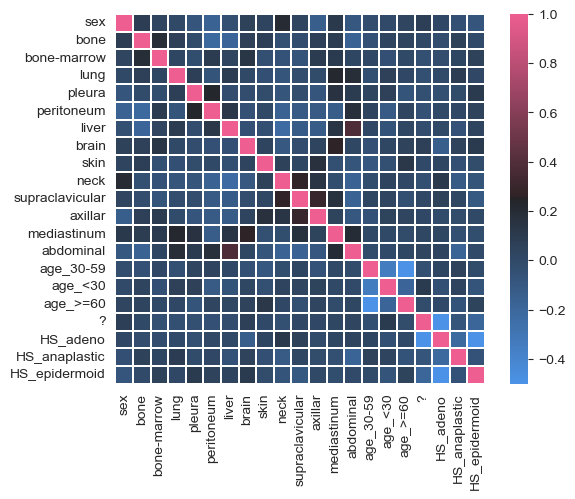

In [15]:
corr = tumor.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)
plt.show()

## Test our Categorical Model

In [16]:
import sys
sys.path.insert(1, '../naive_bayes')

from NaiveBayes import naive_bayes

0.8235294117647058
0.8193118756936738
0.8235294117647058
0.816837846249611
1.8524448871612549


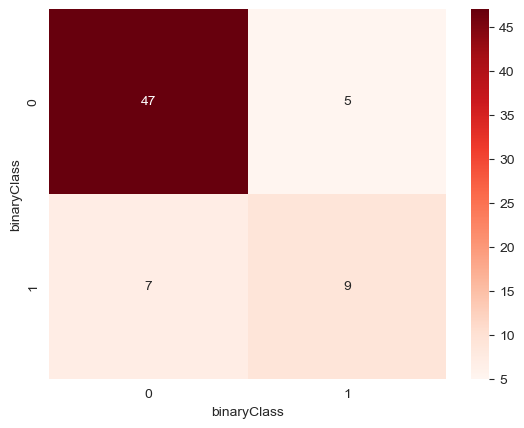

<Figure size 640x480 with 0 Axes>

In [25]:
from sklearn.model_selection import train_test_split
import time
train, test = train_test_split(tumor, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

start_time = time.time()

Y_pred = naive_bayes(train, X_Test=X_test, Y="binaryClass", types = 'categorical')

total_time = time.time() - start_time

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
M = confusion_matrix(y_test, Y_pred)
print(accuracy_score(y_test, Y_pred))
print(f1_score(y_test, Y_pred, average='weighted'))
print(recall_score(y_test, Y_pred, average='weighted'))
print(precision_score(y_test, Y_pred, average='weighted'))
print(total_time)


sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('binaryClass')
plt.ylabel('binaryClass')

plt.show()
plt.draw()

## Cross Validation of our Categorical Naive Bayes

In [18]:
from NaiveBayes import CV

accuracy, recall, f1, precision = CV(tumor, 'binaryClass', 10, True)

print(f"Accuracy {accuracy}")
print(f"Recall {recall}")
print(f"F1 {f1}")
print(f"Precision {precision}")

/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcbosch/opt/anaconda3/lib/python3.9/s

Accuracy 0.7529411764705882
Recall 0.7529411764705882
F1 0.6485053864384227
Precision 0.5716262975778547


/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparison with SKLearn Categorical Naive Bayes

0.8529411764705882
0.8494265630780614
0.8529411764705882
0.8478057889822596
0.008059263229370117


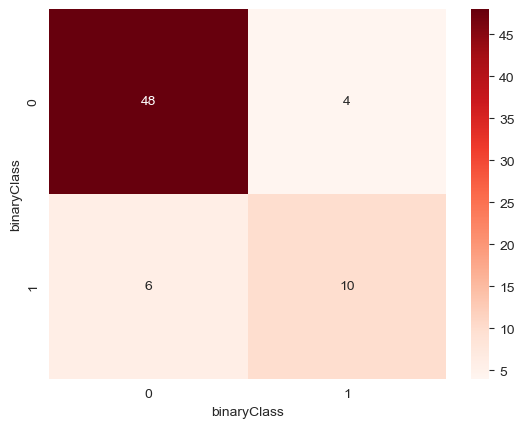

<Figure size 640x480 with 0 Axes>

In [26]:
from sklearn.naive_bayes import CategoricalNB

gnb = CategoricalNB()
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

start_time = time.time()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

total_time = time.time() - start_time


from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
M = confusion_matrix(y_test, y_pred_gnb)
print(accuracy_score(y_test, y_pred_gnb))
print(f1_score(y_test, y_pred_gnb, average='weighted'))
print(recall_score(y_test, y_pred_gnb, average='weighted'))
print(precision_score(y_test, y_pred_gnb, average='weighted'))
print(total_time)

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('binaryClass')
plt.ylabel('binaryClass')

plt.show()
plt.draw()

## Comparison with Logistic Regression

-------- HOLD OUT --------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.71      0.62      0.67        16

    accuracy                           0.85        68
   macro avg       0.80      0.77      0.79        68
weighted avg       0.85      0.85      0.85        68

0.8529411764705882
0.8494265630780614
0.8529411764705882
0.8478057889822596
0.04126095771789551


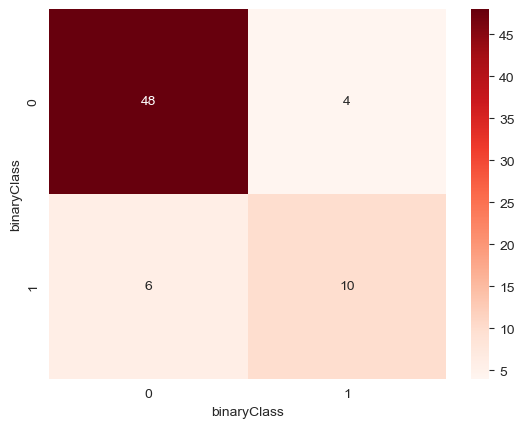

-------- CV --------


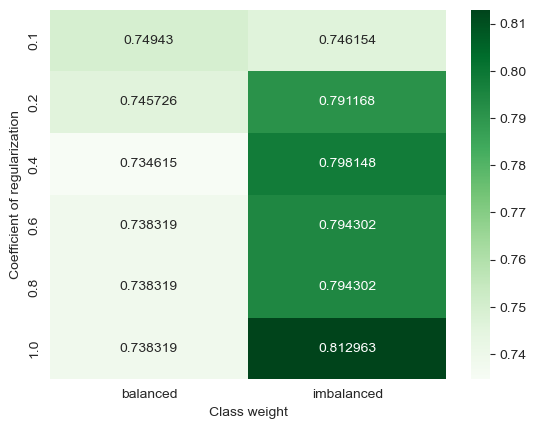

<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()

start_time = time.time()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

total_time = time.time() - start_time

print("-------- HOLD OUT --------")

#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average='weighted'))
print(total_time)

M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('binaryClass')
plt.ylabel('binaryClass')

plt.show()
plt.draw()


print("-------- CV --------")
from sklearn.model_selection import GridSearchCV

a = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
b = ['balanced', 'imbalanced']
param_grid = dict(C=a, class_weight=b)

clf = LogisticRegression()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['C','class_weight']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Coefficient of regularization', 'Class weight', 'Accuracy']
grid_pivot = grid_reset.pivot('Coefficient of regularization', 'Class weight')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

fig = plt.gcf()

sns.heatmap(grid_pivot['Accuracy'],annot=True,cmap='Greens', fmt='g')

plt.show()
plt.draw()